# Solana Validator Exploration

Initial Questions:

* How many validators have the Identity and Vote Account as the same pubkey?
* How many validators have open RPC (and potentially unauthenticated RPC ports?
* How many validators have different network addresses for gossip, tpu, and rpc?

In [111]:
import time
import os

import requests
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import shodan
sns.set()

In [50]:
# https://docs.solana.com/cluster/rpc-endpoints#mainnet-beta
SOLANA_RPC_URL = "https://api.mainnet-beta.solana.com"

headers = {"Content-Type": "application/json"}
data = {"jsonrpc":"2.0", "id": 1}


In [51]:
def solana_rpc_call(headers, data):
    r = requests.post(SOLANA_RPC_URL, headers=headers, json=data)
    response_data = r.json()
    print(response_data)
    return response_data 


def getClusterNodes(data):
    """
docs: https://docs.solana.com/developing/clients/jsonrpc-api#getclusternodes

input: none

output:
pubkey: <string> - Node public key, as base-58 encoded string
gossip: <string | null> - Gossip network address for the node
tpu: <string | null> - TPU network address for the node
rpc: <string | null> - JSON RPC network address for the node, or null if the JSON RPC service is not enabled
version: <string | null> - The software version of the node, or null if the version information is not available
featureSet: <u32 | null > - The unique identifier of the node's feature set
shredVersion: <u16 | null> - The shred version the node has been configured to use


curl http://localhost:8899 -X POST -H "Content-Type: application/json" -d '
  {"jsonrpc":"2.0", "id":1, "method":"getClusterNodes"}
'
    """
    
    data["method"] = "getClusterNodes"
    return solana_rpc_call(headers, data)
    
    

In [52]:


def getVoteAccounts(data):
    """
docs: https://docs.solana.com/developing/clients/jsonrpc-api#getvoteaccounts

parameters:
<object> - (optional) Configuration object containing the following field:
(optional) Commitment
(optional) votePubkey: <string> - Only return results for this validator vote address (base-58 encoded)
(optional) keepUnstakedDelinquents: <bool> - Do not filter out delinquent validators with no stake
(optional) delinquentSlotDistance: <u64> - Specify the number of slots behind the tip that a validator must fall to be considered delinquent. NOTE: For the sake of consistency between ecosystem products, it is not recommended that this argument be specified.

output:
votePubkey: <string> - Vote account address, as base-58 encoded string
nodePubkey: <string> - Validator identity, as base-58 encoded string
activatedStake: <u64> - the stake, in lamports, delegated to this vote account and active in this epoch
epochVoteAccount: <bool> - bool, whether the vote account is staked for this epoch
commission: <number>, percentage (0-100) of rewards payout owed to the vote account
lastVote: <u64> - Most recent slot voted on by this vote account
epochCredits: <array> - History of how many credits earned by the end of each epoch, as an array of arrays containing: [epoch, credits, previousCredits]

    """

    data["method"] = "getVoteAccounts"
    return solana_rpc_call(headers, data)

    


In [53]:
clusterNodeResponse = getClusterNodes(data)

{'jsonrpc': '2.0', 'result': [{'featureSet': 2324890699, 'gossip': '93.187.216.181:8001', 'pubkey': 'CrTdNk65pAcBzf5krCVHW1KTKSxPAdyQPWe2gcKgiqDz', 'rpc': None, 'shredVersion': 51382, 'tpu': '93.187.216.181:8004', 'version': '1.10.38'}, {'featureSet': 2324890699, 'gossip': '141.95.35.64:8001', 'pubkey': 'C219S526JWRzpPUm3FfAzobwZMDuo3DM63phtJpqAz75', 'rpc': None, 'shredVersion': 51382, 'tpu': '141.95.35.64:8004', 'version': '1.10.38'}, {'featureSet': 2324890699, 'gossip': '142.132.128.140:8001', 'pubkey': 'E1SFkvPjU31xWMcvgnX6vhGvfRvb1zXvHFkqmQNEGZKK', 'rpc': None, 'shredVersion': 51382, 'tpu': '142.132.128.140:8003', 'version': '1.10.38'}, {'featureSet': 2324890699, 'gossip': '65.108.70.123:8001', 'pubkey': '2FMWJN52AeqnoTECeicyk724fJbMZLXVyMopBWThyZ1U', 'rpc': None, 'shredVersion': 51382, 'tpu': '65.108.70.123:8004', 'version': '1.10.38'}, {'featureSet': 2324890699, 'gossip': '104.243.41.140:8000', 'pubkey': '84Za5eXvehQLZR6Xqhe9WT6tTcCHTVjw3XU7GCbBRNfW', 'rpc': '104.243.41.140:8899'

In [54]:
voteAccountsResponse = getVoteAccounts(data)

{'jsonrpc': '2.0', 'result': {'current': [{'activatedStake': 161902925782, 'commission': 10, 'epochCredits': [[342, 298582, 0], [343, 662537, 298582], [344, 949010, 662537]], 'epochVoteAccount': True, 'lastVote': 148939909, 'nodePubkey': '2pmZN4xED1hWtVYEwaZKPLhnaFMWidsjJ2VNRHYuLMbx', 'rootSlot': 148939878, 'votePubkey': '9R6U2y1EJShzUj3uRiTjo9ajhJE7jwiF9d6M1M7MR5CZ'}, {'activatedStake': 72056457639924, 'commission': 10, 'epochCredits': [[340, 20795606, 20433921], [341, 21145642, 20795606], [342, 21526476, 21145642], [343, 21890850, 21526476], [344, 22178522, 21890850]], 'epochVoteAccount': True, 'lastVote': 148939909, 'nodePubkey': '6stbr1SZ6zSiandqDPNRKgApT5WPWxPdmZsQcD5wATpW', 'rootSlot': 148939878, 'votePubkey': 'DZVbCCRTbSdyhRBa96rKh3CmX31TFi38CtVZpmoPLzBR'}, {'activatedStake': 73575045871120, 'commission': 10, 'epochCredits': [[340, 64764302, 64399381], [341, 65114184, 64764302], [342, 65497000, 65114184], [343, 65860661, 65497000], [344, 66148330, 65860661]], 'epochVoteAccount':

In [55]:
def parseResponse(response):
    """
    
    """
    result = response.get('result', None)
    return result



In [56]:
voteAccountsResults = parseResponse(voteAccountsResponse)
voteAccountsResults['current']

[{'activatedStake': 161902925782,
  'commission': 10,
  'epochCredits': [[342, 298582, 0],
   [343, 662537, 298582],
   [344, 949010, 662537]],
  'epochVoteAccount': True,
  'lastVote': 148939909,
  'nodePubkey': '2pmZN4xED1hWtVYEwaZKPLhnaFMWidsjJ2VNRHYuLMbx',
  'rootSlot': 148939878,
  'votePubkey': '9R6U2y1EJShzUj3uRiTjo9ajhJE7jwiF9d6M1M7MR5CZ'},
 {'activatedStake': 72056457639924,
  'commission': 10,
  'epochCredits': [[340, 20795606, 20433921],
   [341, 21145642, 20795606],
   [342, 21526476, 21145642],
   [343, 21890850, 21526476],
   [344, 22178522, 21890850]],
  'epochVoteAccount': True,
  'lastVote': 148939909,
  'nodePubkey': '6stbr1SZ6zSiandqDPNRKgApT5WPWxPdmZsQcD5wATpW',
  'rootSlot': 148939878,
  'votePubkey': 'DZVbCCRTbSdyhRBa96rKh3CmX31TFi38CtVZpmoPLzBR'},
 {'activatedStake': 73575045871120,
  'commission': 10,
  'epochCredits': [[340, 64764302, 64399381],
   [341, 65114184, 64764302],
   [342, 65497000, 65114184],
   [343, 65860661, 65497000],
   [344, 66148330, 65860661

In [57]:
clusterNodeResults = parseResponse(clusterNodeResponse)

In [58]:
clusterNodeDF = pd.DataFrame.from_dict(clusterNodeResults)
clusterNodeDF

,featureSet,gossip,pubkey,rpc,shredVersion,tpu,version
0,2.324891e+09,93.187.216.181:8001,CrTdNk65pAcBzf5krCVHW1KTKSxPAdyQPWe2gcKgiqDz,None,51382,93.187.216.181:8004,1.10.38
1,2.324891e+09,141.95.35.64:8001,C219S526JWRzpPUm3FfAzobwZMDuo3DM63phtJpqAz75,None,51382,141.95.35.64:8004,1.10.38
2,2.324891e+09,142.132.128.140:8001,E1SFkvPjU31xWMcvgnX6vhGvfRvb1zXvHFkqmQNEGZKK,None,51382,142.132.128.140:8003,1.10.38
3,2.324891e+09,65.108.70.123:8001,2FMWJN52AeqnoTECeicyk724fJbMZLXVyMopBWThyZ1U,None,51382,65.108.70.123:8004,1.10.38
4,2.324891e+09,104.243.41.140:8000,84Za5eXvehQLZR6Xqhe9WT6tTcCHTVjw3XU7GCbBRNfW,104.243.41.140:8899,51382,104.243.41.140:8003,1.10.38
...,...,...,...,...,...,...,...
3470,9.652217e+08,116.202.219.74:8001,3ZVHP7fHCrLEWpGfvvxaVifMBXzV6cHGPWdv7saqm3tf,None,51382,None,1.10.25
3471,2.945819e+09,204.16.244.218:8000,HZF34Kzkn8fh88TJV6KfgZGmBRBiFX9bXdmsnoQBVTMk,None,51382,None,1.9.24
3472,2.324891e+09,3.239.23.69:8000,4d2LuSHgDcshR6EP9KNyQYHqtMvmvoCpxyoDUnXsvZGd,None,51382,None,1.10.38
3473,3.235627e+09,3.122.41.18:8000,i1JsbTFD7g7wvQGhnLYBh5EgjrYNWkZineBozLRF3rj,None,51382,None,1.10.5


In [59]:
voteAccountDF = pd.DataFrame.from_dict(voteAccountsResults['current'])
voteAccountDF.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey
0,161902925782,10,"[[342, 298582, 0], [343, 662537, 298582], [344...",True,148939909,2pmZN4xED1hWtVYEwaZKPLhnaFMWidsjJ2VNRHYuLMbx,148939878,9R6U2y1EJShzUj3uRiTjo9ajhJE7jwiF9d6M1M7MR5CZ
1,72056457639924,10,"[[340, 20795606, 20433921], [341, 21145642, 20...",True,148939909,6stbr1SZ6zSiandqDPNRKgApT5WPWxPdmZsQcD5wATpW,148939878,DZVbCCRTbSdyhRBa96rKh3CmX31TFi38CtVZpmoPLzBR
2,73575045871120,10,"[[340, 64764302, 64399381], [341, 65114184, 64...",True,148939909,CouDacpBtF6mmN5K9aXyVds1XRkmo6J4t8ebFZxAecGh,148939878,3v6FfdWMT2bcoQQ9hN4F2syu7qhRHzNuCPPQqV12hsw2
3,88089453698287,10,"[[340, 94608129, 94241156], [341, 94961143, 94...",True,148939908,245B9WFHUGuWycSXHagHXwsXGcxDkNYfxWBaeh7vAHDU,148939877,BfF3vg8UFcwTkFJNgQ7KQTAZBUWegF3spPm79d71WNwo
4,72894556599925,10,"[[340, 36298391, 35932081], [341, 36651663, 36...",True,148939909,3yrgchivxUEdz3qAAx3X7vfrFLerPMJsLTEMwJyqvy7h,148939878,B6NRKJoqzju5YniVq7aaDbbL6n39VJ7yLmJPWNhZ9Hcq


In [60]:
clusterNodeDF.rename(columns = {'pubkey': 'nodePubkey'}, inplace = True)
voteAccountDF_join_clusterNodeDF = pd.merge(voteAccountDF, clusterNodeDF, on = "nodePubkey")
voteAccountDF_join_clusterNodeDF.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version
0,161902925782,10,"[[342, 298582, 0], [343, 662537, 298582], [344...",True,148939909,2pmZN4xED1hWtVYEwaZKPLhnaFMWidsjJ2VNRHYuLMbx,148939878,9R6U2y1EJShzUj3uRiTjo9ajhJE7jwiF9d6M1M7MR5CZ,2.324891e+09,65.109.25.131:8000,None,51382,65.109.25.131:8003,1.10.38
1,72056457639924,10,"[[340, 20795606, 20433921], [341, 21145642, 20...",True,148939909,6stbr1SZ6zSiandqDPNRKgApT5WPWxPdmZsQcD5wATpW,148939878,DZVbCCRTbSdyhRBa96rKh3CmX31TFi38CtVZpmoPLzBR,2.324891e+09,162.55.101.59:8000,None,51382,162.55.101.59:8003,1.10.38
2,73575045871120,10,"[[340, 64764302, 64399381], [341, 65114184, 64...",True,148939909,CouDacpBtF6mmN5K9aXyVds1XRkmo6J4t8ebFZxAecGh,148939878,3v6FfdWMT2bcoQQ9hN4F2syu7qhRHzNuCPPQqV12hsw2,2.324891e+09,65.108.96.175:8000,None,51382,65.108.96.175:8003,1.10.38
3,88089453698287,10,"[[340, 94608129, 94241156], [341, 94961143, 94...",True,148939908,245B9WFHUGuWycSXHagHXwsXGcxDkNYfxWBaeh7vAHDU,148939877,BfF3vg8UFcwTkFJNgQ7KQTAZBUWegF3spPm79d71WNwo,2.324891e+09,65.21.94.8:8001,None,51382,65.21.94.8:8004,1.10.38
4,72894556599925,10,"[[340, 36298391, 35932081], [341, 36651663, 36...",True,148939909,3yrgchivxUEdz3qAAx3X7vfrFLerPMJsLTEMwJyqvy7h,148939878,B6NRKJoqzju5YniVq7aaDbbL6n39VJ7yLmJPWNhZ9Hcq,2.324891e+09,65.108.226.31:8000,None,51382,65.108.226.31:8003,1.10.38


In [61]:

voteAccountDF_join_clusterNodeDF['pubkey_diff'] = np.where((voteAccountDF_join_clusterNodeDF['nodePubkey'] == voteAccountDF_join_clusterNodeDF['votePubkey'] ), True, False)
same_key_mask = voteAccountDF_join_clusterNodeDF['pubkey_diff'].values == True

same_key_df = voteAccountDF_join_clusterNodeDF[same_key_mask]
same_key_df

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version,pubkey_diff


In [62]:
rpc_address_mask = voteAccountDF_join_clusterNodeDF['rpc'].values != None
rpc_address_df = voteAccountDF_join_clusterNodeDF[rpc_address_mask]
rpc_address_df.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version,pubkey_diff
5,111152797360949,10,"[[340, 118490292, 118126965], [341, 118838622,...",True,148939909,2jS8AX38m8F9C5juToW1FmTufEbb1DfDzZJj9HSJcWwo,148939878,D3DfFvmLBKkX9JJNEpJRXpM1pYTVPQ5dpPQRc9F49xk4,2.324891e+09,185.252.220.87:8001,185.252.220.87:8899,51382,185.252.220.87:8004,1.10.38,False
6,72720856872406,10,"[[340, 37288669, 36925775], [341, 37638188, 37...",True,148939909,CkXqq2TFqdiST4SR4YEiqoPwvJboiPv4EZYz9dFZodR3,148939878,tnaKD5evRkBonwyW5n5yKoJrt7H871Aboh1AWXH9AFj,4.830972e+08,65.108.225.75:8000,65.108.225.75:8899,51382,65.108.225.75:8003,1.10.35,False
10,73442645100871,10,"[[340, 44603031, 44236407], [341, 44957203, 44...",True,148939909,HYbbNj9BiZ2ZGxGxWCry1KgjBt4SnojAmcKcUi6RxvMk,148939878,5xyBz6L1dwHRKAnaNWVeJdUfUMw4GsU4tBRPZyRfajnk,2.324891e+09,142.132.207.109:8000,142.132.207.109:8899,51382,142.132.207.109:8003,1.10.38,False
12,72947657849607,10,"[[340, 32415151, 32087607], [341, 32756004, 32...",True,148939909,HgrgNPfY8DsPxxPdmjxNTFXZpgiknZvPMXv9ipbZbbVM,148939878,7jp9iA5QF4VJrV1YZ47FqFDziuZALp9wJSWRLWBa4Lg7,4.830972e+08,141.94.161.184:8000,141.94.161.184:8899,51382,141.94.161.184:8003,1.10.35,False
16,1496240405296,10,"[[340, 3397053, 3105932], [341, 3444012, 33970...",True,148939908,9iyX9titm8QXf7NvYVAHSGcZ51L23VgJh8U3As8zUGE3,148939877,GAZaihZ1MPSWpL9pq8YnxTrUBjBcXSoFpx5mykMvAPAw,2.324891e+09,85.10.200.190:8001,85.10.200.190:8899,51382,85.10.200.190:8004,1.10.38,False


In [63]:
total_delinquent_validators = len(voteAccountsResults['delinquent'])

In [64]:
total_current_validators = len(voteAccountsResults['current'])

In [65]:
num_validators_with_rpc = rpc_address_df.shape[0]

In [66]:
percent_validators_with_rpc = (num_validators_with_rpc / total_current_validators ) * 100
print(f"Percentage of Validators with RPC Enabled: {percent_validators_with_rpc:.2f}%")

Percentage of Validators with RPC Enabled: 14.36%


In [121]:
def get_ip_information(network_addr):
    
    
    url = "https://ipapi.co"
    ip = parse_ip(network_addr)
    req_url = f"{url}/{ip}/json/"
    
    r = requests.get(req_url).json()
    ip_information = (
        ip,
        r.get("asn"),
        r.get("org"),
        r.get("country"),
        r.get("longitude"),
        r.get("latitude")
    )
    return ip_information

def get_ip_information_dict(network_addr):
    
    
    url = "https://ipapi.co"
    ip = parse_ip(network_addr)
    if ip is None:
        return { "ip": None, "asn": None, "org": None, "country": None,"longitude": None, "latitude": None}
    
    req_url = f"{url}/{ip}/json/"
    
    r = requests.get(req_url).json()
    ip_information = {
        "ip": ip,
        "asn": r.get("asn", None),
        "org": r.get("org", None),
        "country": r.get("country", None),
        "longitude": r.get("longitude", None),
        "latitude": r.get("latitude", None)
    }
    return ip_information

def parse_ip(network_addr):
    """
    > parse_ip("198.244.213.77:8000")
    "198.244.213.77"
    
    """
    if network_addr is None:
        return None
    return network_addr.split(':')[0]

#print(get_ip_information('8.8.8.8'))
#print(parse_ip("198.244.213.77:8000"))

def print_row(item):
    return {'this': item}


def get_ip_information_shodan(network_addr):
    
    """
    https://help.shodan.io/developer-fundamentals/looking-up-ip-info
    """
    SHODAN_API = os.getenv("SHODAN_API_KEY")
    if not SHODAN_API:
        print("requires SHODAN_API_KEY as env variable")
        return
    #SHODAN_API = "v2Wfs1gxbHCUcj4YwuoocwaobCg195KE"
    api = shodan.Shodan(SHODAN_API)
    
    ip = parse_ip(network_addr)
    if ip is None:
        return { "ip": None, "asn": None, "org": None, "country": None,"longitude": None, "latitude": None}
    
    print(f"trying IP: {ip}")
    try:
        info = api.host(ip)
    except shodan.APIError as error:
        print(f"{error} - IP: {ip}")
        return { "ip": None, "asn": None, "org": None, "country": None,"longitude": None, "latitude": None}
    time.sleep(1)
    ip_information = {
        "ip": ip,
        "asn": info.get("asn", None),
        "org": info.get("org", None),
        "country": info.get("country_code", None),
        "longitude": info.get("longitude", None),
        "latitude": info.get("latitude", None)
    }
    return ip_information

print(get_ip_information_shodan('8.8.8.8:2001'))
print(get_ip_information_dict('8.8.8.8:2001'))

requires SHODAN_API_KEY as env variable
None
{'ip': '8.8.8.8', 'asn': 'AS15169', 'org': 'GOOGLE', 'country': 'US', 'longitude': -122.083352, 'latitude': 37.42301}


In [68]:
sol_df = voteAccountDF_join_clusterNodeDF
#sol_df['ip'], sol_df['asn'],  sol_df['org'],  sol_df['country'],  sol_df['longitude'],  sol_df['latitude']   = zip(*sol_df['tpu'].map(get_ip_information) )


In [113]:
sol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1935
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   activatedStake    1936 non-null   int64   
 1   commission        1936 non-null   int64   
 2   epochCredits      1936 non-null   object  
 3   epochVoteAccount  1936 non-null   bool    
 4   lastVote          1936 non-null   int64   
 5   nodePubkey        1936 non-null   object  
 6   rootSlot          1936 non-null   int64   
 7   votePubkey        1936 non-null   object  
 8   featureSet        1936 non-null   float64 
 9   gossip            1936 non-null   object  
 10  rpc               278 non-null    object  
 11  shredVersion      1936 non-null   int64   
 12  tpu               1935 non-null   object  
 13  version           1936 non-null   object  
 14  pubkey_diff       1936 non-null   bool    
 15  ip                1860 non-null   object  
 16  asn               1615 n

In [70]:
applied_df = sol_df.apply(lambda row: get_ip_information_shodan(row['tpu']), axis='columns', result_type='expand')
applied_df.head()

trying IP: 65.109.25.131
trying IP: 162.55.101.59
trying IP: 65.108.96.175
trying IP: 65.21.94.8
trying IP: 65.108.226.31
trying IP: 185.252.220.87
trying IP: 65.108.225.75
trying IP: 162.220.162.234
trying IP: 108.171.206.14
trying IP: 135.181.60.196
trying IP: 142.132.207.109
trying IP: 141.94.134.154
trying IP: 141.94.161.184
trying IP: 104.243.41.187
trying IP: 162.55.10.116
trying IP: 142.132.128.220
trying IP: 85.10.200.190
trying IP: 141.95.65.185
trying IP: 198.244.178.225
trying IP: 142.132.197.88
trying IP: 141.94.242.51
trying IP: 65.108.193.99
trying IP: 86.109.14.235
trying IP: 85.10.193.167
trying IP: 198.244.212.3
trying IP: 144.76.92.110
trying IP: 104.243.42.216
trying IP: 104.244.243.108
trying IP: 213.133.99.244
trying IP: 142.132.131.173
trying IP: 65.108.111.251
trying IP: 141.94.139.116
trying IP: 136.144.57.207
trying IP: 142.132.139.232
trying IP: 107.155.101.130
trying IP: 141.95.35.53
trying IP: 92.253.237.253
trying IP: 141.95.85.59
trying IP: 199.127.60.249


trying IP: 15.235.11.182
trying IP: 204.16.245.197
trying IP: 141.94.138.32
trying IP: 15.235.65.93
trying IP: 107.155.103.194
trying IP: 141.95.45.133
trying IP: 141.94.101.87
trying IP: 178.170.15.12
trying IP: 5.9.99.221
trying IP: 104.194.11.68
trying IP: 213.246.39.25
trying IP: 145.40.106.75
trying IP: 51.222.248.83
trying IP: 141.94.73.2
trying IP: 213.239.217.55
trying IP: 92.63.195.89
trying IP: 66.45.248.238
trying IP: 147.28.133.59
trying IP: 150.136.15.237
trying IP: 65.21.196.208
trying IP: 104.243.41.190
trying IP: 147.75.94.183
trying IP: 85.10.195.84
trying IP: 157.90.211.153
trying IP: 74.81.44.134
trying IP: 142.132.252.159
trying IP: 178.170.15.11
trying IP: 65.108.68.222
trying IP: 5.9.104.56
trying IP: 135.125.5.69
trying IP: 15.235.9.87
trying IP: 194.44.10.106
trying IP: 147.75.85.159
trying IP: 141.94.131.155
trying IP: 65.108.45.241
trying IP: 135.181.59.82
trying IP: 23.88.83.134
trying IP: 15.235.80.175
trying IP: 66.23.239.62
trying IP: 15.235.55.233
trying 

trying IP: 136.243.111.169
trying IP: 142.132.128.236
trying IP: 65.108.72.164
trying IP: 65.21.232.95
trying IP: 173.231.55.58
trying IP: 104.194.9.64
trying IP: 65.108.234.150
trying IP: 216.202.248.36
trying IP: 198.244.230.19
trying IP: 116.202.206.116
trying IP: 130.61.235.159
trying IP: 46.4.27.233
trying IP: 65.108.69.190
trying IP: 141.94.162.54
trying IP: 141.95.124.134
trying IP: 146.59.84.23
trying IP: 185.81.65.71
trying IP: 157.90.128.28
trying IP: 15.235.9.78
trying IP: 146.19.24.144
trying IP: 65.108.128.158
trying IP: 142.132.251.238
trying IP: 65.21.138.169
trying IP: 141.94.242.106
trying IP: 65.108.140.209
trying IP: 23.88.73.42
trying IP: 15.235.53.238
trying IP: 65.108.68.83
trying IP: 65.108.69.36
trying IP: 162.19.139.111
trying IP: 65.109.26.217
trying IP: 64.20.56.134
trying IP: 135.181.56.183
trying IP: 141.94.141.199
trying IP: 3.249.222.252
trying IP: 198.244.178.58
trying IP: 65.108.72.186
trying IP: 116.202.116.138
trying IP: 185.162.130.18
Bad Gateway (50

trying IP: 185.150.189.225
No information available for that IP. - IP: 185.150.189.225
trying IP: 149.255.33.74
trying IP: 50.115.46.206
trying IP: 45.58.126.46
trying IP: 65.108.136.250
trying IP: 104.148.56.26
trying IP: 172.96.160.230
trying IP: 194.126.172.206
trying IP: 168.119.91.91
trying IP: 66.45.254.242
trying IP: 176.9.74.115
trying IP: 93.187.216.237
trying IP: 51.178.74.205
trying IP: 141.95.173.171
trying IP: 15.235.12.17
trying IP: 141.94.199.154
trying IP: 204.16.246.163
trying IP: 5.61.52.246
trying IP: 147.28.133.51
trying IP: 176.9.54.43
trying IP: 213.239.218.21
trying IP: 65.108.122.179
trying IP: 84.32.189.34
trying IP: 65.21.224.186
trying IP: 15.235.9.137
trying IP: 5.45.78.75
trying IP: 148.59.149.162
trying IP: 65.108.64.26
trying IP: 147.75.92.147
trying IP: 69.197.13.5
trying IP: 107.182.163.146
trying IP: 148.251.23.209
No information available for that IP. - IP: 148.251.23.209
trying IP: 172.93.101.104
trying IP: 103.195.100.160
trying IP: 185.16.38.73
try

trying IP: 65.108.225.237
trying IP: 65.108.206.75
trying IP: 65.108.121.198
trying IP: 216.18.201.178
trying IP: 51.222.203.70
trying IP: 141.95.35.127
trying IP: 185.191.127.239
trying IP: 162.19.139.109
trying IP: 65.108.226.10
trying IP: 194.44.10.61
trying IP: 141.95.144.44
trying IP: 85.10.200.216
trying IP: 141.94.199.92
trying IP: 198.244.229.45
trying IP: 85.10.200.115
trying IP: 65.141.175.125
No information available for that IP. - IP: 65.141.175.125
trying IP: 141.95.169.12
trying IP: 65.108.121.233
trying IP: 216.202.251.12
trying IP: 65.108.47.146
trying IP: 204.16.241.214
trying IP: 168.119.31.166
trying IP: 92.253.237.41
trying IP: 172.93.110.232
trying IP: 15.235.54.145
No information available for that IP. - IP: 15.235.54.145
trying IP: 91.144.163.56
trying IP: 65.108.76.47
trying IP: 65.108.75.246
trying IP: 142.132.251.253
trying IP: 141.94.134.222
trying IP: 104.148.56.146
trying IP: 34.69.80.75
trying IP: 23.111.254.210
trying IP: 144.76.90.156
trying IP: 141.95.1

trying IP: 5.9.122.22
trying IP: 88.198.33.245
trying IP: 145.40.75.137
trying IP: 146.59.54.42
trying IP: 89.188.126.164
trying IP: 185.12.142.47
trying IP: 198.244.212.124
trying IP: 162.19.20.236
trying IP: 65.21.237.99
trying IP: 65.108.226.27
trying IP: 216.18.217.174
trying IP: 15.235.42.128
trying IP: 65.21.195.53
trying IP: 172.93.101.76
trying IP: 141.95.35.203
trying IP: 141.94.111.192
trying IP: 162.19.80.78
trying IP: 65.108.72.230
trying IP: 45.139.122.107
trying IP: 65.108.136.249
trying IP: 141.94.139.100
trying IP: 18.202.196.20
trying IP: 135.148.171.211
trying IP: 198.244.200.191
trying IP: 104.243.41.140
trying IP: 185.81.65.83
trying IP: 15.235.13.221
trying IP: 88.198.36.250
trying IP: 65.108.235.28
trying IP: 173.231.55.26
trying IP: 23.229.71.130
trying IP: 65.109.20.150
trying IP: 142.132.133.114
trying IP: 141.95.35.217
trying IP: 84.244.95.236
No information available for that IP. - IP: 84.244.95.236
trying IP: 65.108.233.125
trying IP: 107.182.163.210
trying 

trying IP: 198.244.229.199
trying IP: 172.96.160.231
trying IP: 35.155.253.94
trying IP: 141.95.35.125
trying IP: 165.140.87.38
trying IP: 146.19.24.154
trying IP: 65.108.79.88
trying IP: 145.40.113.229
trying IP: 15.235.13.209
trying IP: 172.93.110.248
trying IP: 23.88.65.31
trying IP: 138.201.123.119
trying IP: 213.239.211.146
No information available for that IP. - IP: 213.239.211.146
trying IP: 65.109.20.210
trying IP: 141.95.168.227
trying IP: 141.95.202.195
trying IP: 5.9.93.23
trying IP: 65.108.124.208
trying IP: 142.132.140.111
trying IP: 65.108.206.180
trying IP: 138.201.58.150
trying IP: 172.96.172.249
trying IP: 157.90.93.241
trying IP: 65.108.76.34
trying IP: 202.8.9.61
trying IP: 157.90.208.154
trying IP: 103.195.102.11
trying IP: 163.123.204.194
trying IP: 80.190.129.58
No information available for that IP. - IP: 80.190.129.58
trying IP: 142.132.152.44
trying IP: 176.9.31.151
trying IP: 64.140.169.106
trying IP: 23.88.1.55
trying IP: 142.132.132.98
trying IP: 213.239.218.

,ip,asn,org,country,longitude,latitude
0,65.109.25.131,AS24940,Hetzner Online GmbH,FI,24.93545,60.16952
1,162.55.101.59,None,Hetzner Online GmbH,DE,10.75971,49.11663
2,65.108.96.175,AS14135,"Alabanza, Inc.",US,-71.05977,42.35843
3,65.21.94.8,AS24940,Hetzner Online GmbH,FI,24.97940,60.35400
4,65.108.226.31,AS24940,Hetzner Online GmbH,FI,24.93545,60.16952


In [72]:
applied_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1935
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ip         1860 non-null   object 
 1   asn        1615 non-null   object 
 2   org        1846 non-null   object 
 3   country    1860 non-null   object 
 4   longitude  1860 non-null   float64
 5   latitude   1860 non-null   float64
dtypes: float64(2), object(4)
memory usage: 105.9+ KB


In [74]:
new_df = pd.concat([sol_df, applied_df], axis='columns')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1935
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activatedStake    1936 non-null   int64  
 1   commission        1936 non-null   int64  
 2   epochCredits      1936 non-null   object 
 3   epochVoteAccount  1936 non-null   bool   
 4   lastVote          1936 non-null   int64  
 5   nodePubkey        1936 non-null   object 
 6   rootSlot          1936 non-null   int64  
 7   votePubkey        1936 non-null   object 
 8   featureSet        1936 non-null   float64
 9   gossip            1936 non-null   object 
 10  rpc               278 non-null    object 
 11  shredVersion      1936 non-null   int64  
 12  tpu               1935 non-null   object 
 13  version           1936 non-null   object 
 14  pubkey_diff       1936 non-null   bool   
 15  ip                1860 non-null   object 
 16  asn               1615 non-null   object 


In [91]:
#save_point
#new_df.to_pickle("ip_info_from_shodan_data_df.sep-3-2022.pkl")
# load pickle with
#sol_df = pd.read_pickle("sol_df.pkl")
new_df.head()
sol_df = new_df
sol_df.info()
metadata = "shodan_data_sep3_2022"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1935
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   activatedStake    1936 non-null   int64   
 1   commission        1936 non-null   int64   
 2   epochCredits      1936 non-null   object  
 3   epochVoteAccount  1936 non-null   bool    
 4   lastVote          1936 non-null   int64   
 5   nodePubkey        1936 non-null   object  
 6   rootSlot          1936 non-null   int64   
 7   votePubkey        1936 non-null   object  
 8   featureSet        1936 non-null   float64 
 9   gossip            1936 non-null   object  
 10  rpc               278 non-null    object  
 11  shredVersion      1936 non-null   int64   
 12  tpu               1935 non-null   object  
 13  version           1936 non-null   object  
 14  pubkey_diff       1936 non-null   bool    
 15  ip                1860 non-null   object  
 16  asn               1615 n

In [94]:
# duplicates entered from zip/map 
# sol_df = sol_df.loc[:, ~sol_df.columns.duplicated()].copy()

In [92]:
print(sol_df[["country", "org"]].describe())
org = sol_df["org"]
print()
print("Organization Distribution Stats")
print(org.value_counts(normalize=True).nlargest(10))
print()
print("Country Distribution Stats")
print(sol_df.country.value_counts(normalize=True).nlargest(10))


       country                  org
count     1860                 1846
unique      27                  153
top         US  Hetzner Online GmbH
freq       587                  463

Organization Distribution Stats
Hetzner Online GmbH                 0.250813
OVH SAS                             0.085590
Alabanza, Inc.                      0.066089
Hetzner Online AG                   0.057421
ReliableSite.Net LLC                0.057421
Max Goeldi trading as Goeldi Tec    0.050379
WebNX, Inc.                         0.042795
Interserver, Inc                    0.035211
University of Winnipeg              0.025460
Packet Host, Inc.                   0.023835
Name: org, dtype: float64

Country Distribution Stats
US    0.315591
DE    0.244624
FI    0.100538
FR    0.092473
CH    0.050000
CA    0.048387
GB    0.025806
RU    0.025806
PL    0.023656
NL    0.015591
Name: country, dtype: float64


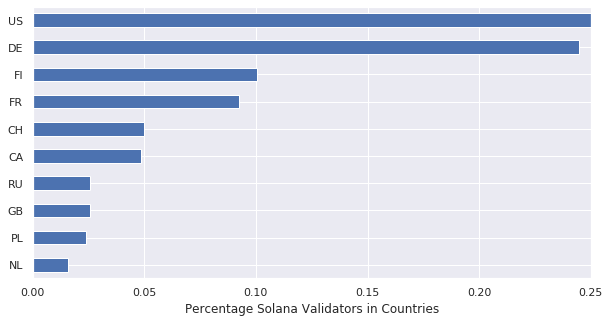

In [118]:
# https://stackoverflow.com/questions/19555525
# help saving images
f, ax = plt.subplots(figsize=(10, 5))
plot = sol_df["country"].value_counts(normalize=True).nlargest(10).sort_values().plot.barh()
ax.set(xlim=(0, .25),ylabel="",
       xlabel="Percentage Solana Validators in Countries")
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-Node-Distribution.png")

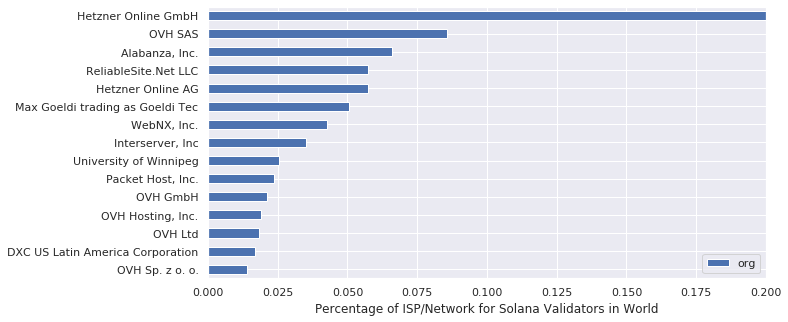

In [119]:

f, ax = plt.subplots(figsize=(10, 5))

plot = org.value_counts(normalize=True).nlargest(15).sort_values().plot.barh()
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .20),ylabel="",
       xlabel="Percentage of ISP/Network for Solana Validators in World")
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-Node-ISP-Distribution.png")

In [95]:
node_df = sol_df
gdf = geopandas.GeoDataFrame(
    node_df, crs="epsg:4269", geometry=geopandas.points_from_xy(node_df.longitude, node_df.latitude))
gdf = gdf.fillna('')
#gdf.geometry.head()

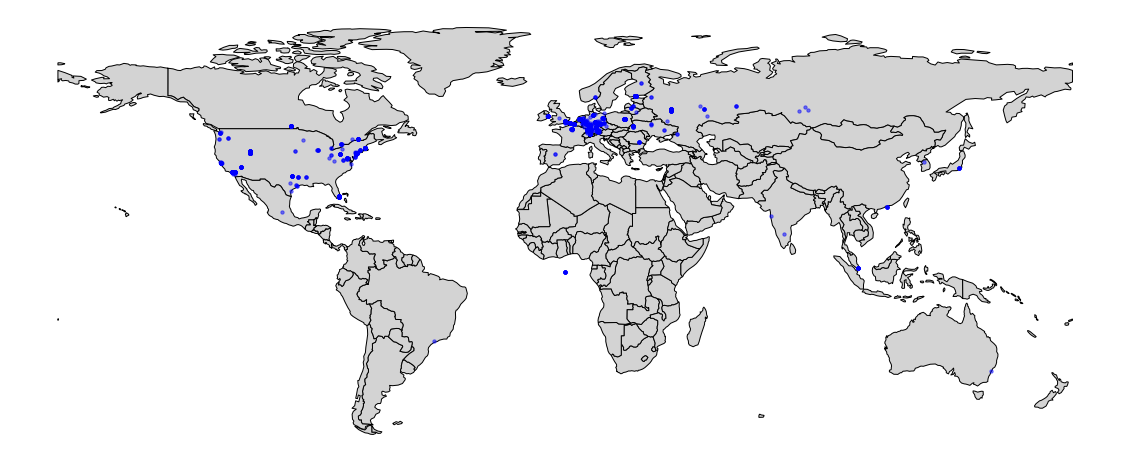

In [120]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[~world.continent.isin(['Antarctica'])]


ax = world.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(20,10))

# We can now plot our ``GeoDataFrame``.
plot = gdf.plot(markersize=11, color='blue', alpha=0.5, ax=ax )
ax.axis('off')

plt.show()
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-World-Distribution.png")

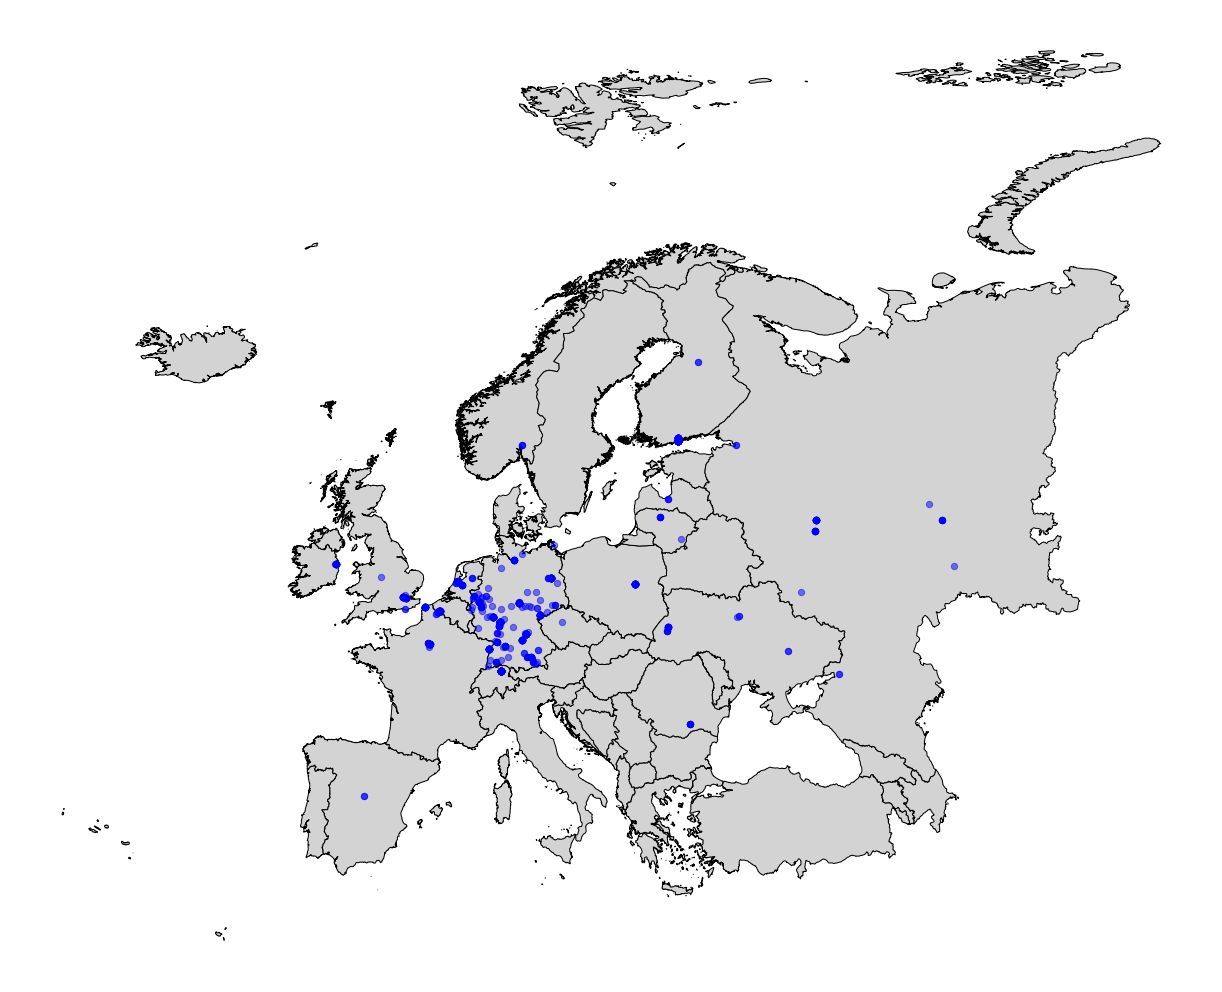

In [122]:
#europe = geopandas.read_file("shape-data/NUTS_RG_20M_2021_3857/NUTS_RG_20M_2021_3857.shp")
europe = geopandas.read_file("shape-data/europe-shape/Europe.shp")

gdf_eu = geopandas.GeoDataFrame(
    node_df, geometry=geopandas.points_from_xy(node_df.longitude, node_df.latitude))
gdf_eu = gdf.fillna('')


ax = europe.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(50, 18))
eu_intersection = geopandas.overlay(gdf_eu.to_crs(4326), europe, how='intersection')
plot = eu_intersection.plot(markersize=40, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
ax.set(xlabel="All Solana Validators in Europe")
plt.show()
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/solana-validators-in-europe.png")

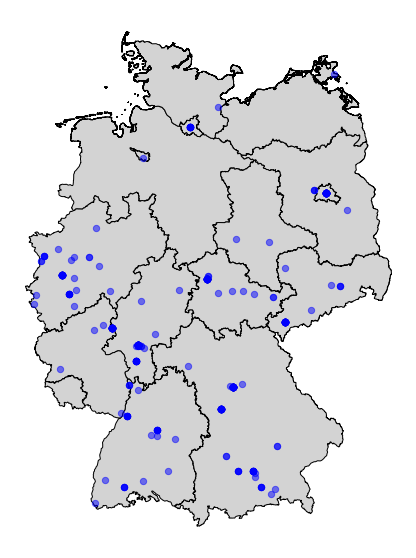

In [108]:
#german shapefile: https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/germany-shapefile/at_download/file
gdf_de = gdf_eu[gdf_eu.country == "DE"]
germany = geopandas.read_file("shape-data/german-shp/DEU_adm1.shp")

ax = germany.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(30, 10))
eu_intersection = geopandas.overlay(gdf_de.to_crs(4326), germany, how='intersection')
plot = eu_intersection.plot(markersize=40, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
ax.set(xlabel="Solana Validators in Germany")
plt.show()
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-German-Distribution.png")

In [99]:

states = geopandas.read_file("shape-data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
#states.tail(5)

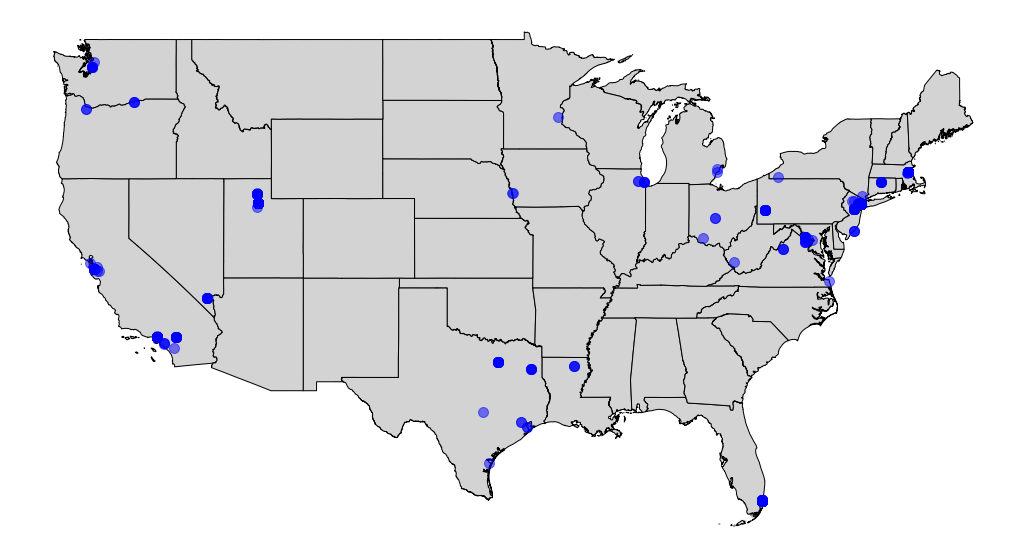

In [100]:
ax = states.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(20,10))

# We can now plot our ``GeoDataFrame``.
#gdf.plot(markersize=10, color='pink', alpha=0.5, ax=ax)

us_intersection = geopandas.overlay(gdf, states, how='intersection')
plot = us_intersection.plot(markersize=100, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
ax.set(xlabel="All Solana Validators in US")
plt.show()
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-USA-Distribution.png")

In [101]:
gdf = gdf.fillna('')
comcast_nodes = gdf[gdf["org"].str.contains('PACKET')]
comcast_intersection = geopandas.overlay(comcast_nodes, states, how='intersection')
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(150,50))
comcast_intersection.plot(markersize=1000, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
#ax.set(xlabel="Comcast Peers in US")
plt.show()

/home/jnaulty/.local/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

<Figure size 10800x3600 with 1 Axes>

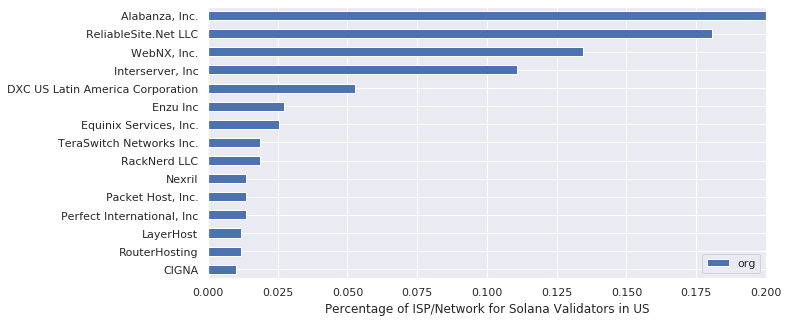

In [102]:
f, ax = plt.subplots(figsize=(10, 5))
plot = us_intersection["org"].value_counts(normalize=True).nlargest(15).sort_values().plot.barh()
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .20),ylabel="",
       xlabel="Percentage of ISP/Network for Solana Validators in US")
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-USA-Distribution-barchart.png")

In [103]:
us_intersection["org"].value_counts(normalize=True).nlargest(10)

Alabanza, Inc.                      0.207836
ReliableSite.Net LLC                0.180579
WebNX, Inc.                         0.134583
Interserver, Inc                    0.110733
DXC US Latin America Corporation    0.052811
Enzu Inc                            0.027257
Equinix Services, Inc.              0.025554
RackNerd LLC                        0.018739
TeraSwitch Networks Inc.            0.018739
Perfect International, Inc          0.013629
Name: org, dtype: float64

In [104]:
gdf_de.org.value_counts(normalize=True).nlargest(10)

Hetzner Online GmbH          0.606593
Hetzner Online AG            0.232967
OVH GmbH                     0.085714
myLoc managed IT AG          0.013187
IP-Projects GmbH & Co. KG    0.010989
Contabo GmbH                 0.008791
marbis GmbH                  0.008791
Oracle Public Cloud          0.006593
                             0.006593
Packet Host, Inc.            0.004396
Name: org, dtype: float64

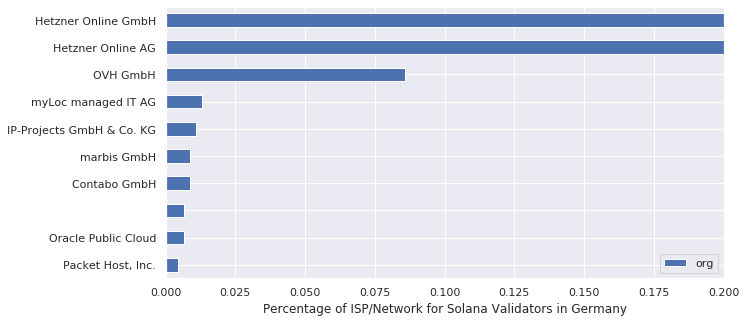

In [105]:
f, ax = plt.subplots(figsize=(10, 5))

plot = gdf_de.org.value_counts(normalize=True).nlargest(10).sort_values().plot.barh()
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .20),ylabel="",
       xlabel="Percentage of ISP/Network for Solana Validators in Germany")
fig = plot.get_figure()
fig.savefig(f"figures/{metadata}/Solana-Validator-German-ISP-Distribution-bar.png")

In [106]:
sol_df.country.value_counts(normalize=True).nlargest(20).sort_values(ascending=False)

US    0.315591
DE    0.244624
FI    0.100538
FR    0.092473
CH    0.050000
CA    0.048387
GB    0.025806
RU    0.025806
PL    0.023656
NL    0.015591
IE    0.012903
UA    0.012903
SG    0.005914
      0.004301
JP    0.003763
LT    0.003226
HK    0.003226
RO    0.003226
LV    0.001613
NO    0.001613
Name: country, dtype: float64

In [107]:
sol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1935
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   activatedStake    1936 non-null   int64   
 1   commission        1936 non-null   int64   
 2   epochCredits      1936 non-null   object  
 3   epochVoteAccount  1936 non-null   bool    
 4   lastVote          1936 non-null   int64   
 5   nodePubkey        1936 non-null   object  
 6   rootSlot          1936 non-null   int64   
 7   votePubkey        1936 non-null   object  
 8   featureSet        1936 non-null   float64 
 9   gossip            1936 non-null   object  
 10  rpc               278 non-null    object  
 11  shredVersion      1936 non-null   int64   
 12  tpu               1935 non-null   object  
 13  version           1936 non-null   object  
 14  pubkey_diff       1936 non-null   bool    
 15  ip                1860 non-null   object  
 16  asn               1615 n

In [117]:
coverage = (sol_df.org.count() / sol_df.nodePubkey.count()) * 100
print(f"Percent of Solana Validators covered from scan: {coverage:.2f}%")

Percent of Solana Validators covered from scan: 95.35%
